In [3]:
import os
import zipfile

# Use the actual path where your file is stored
val_zip = r"C:\Users\laksh\Downloads\val2017 (1).zip"
ann_zip = r"C:\Users\laksh\Downloads\annotations_trainval2017.zip"  # <-- update this to the real location of your annotations zip

data_dir = "coco_dataset"

# Extract val2017 images
if not os.path.exists(os.path.join(data_dir, "val2017")):
    print("Extracting val2017 images...")
    with zipfile.ZipFile(val_zip, 'r') as zip_ref:
        zip_ref.extractall(data_dir)

# Extract annotations
if not os.path.exists(os.path.join(data_dir, "annotations")):
    print("Extracting annotations...")
    with zipfile.ZipFile(ann_zip, 'r') as zip_ref:
        zip_ref.extractall(data_dir)

print("✅ Extraction complete!")


Extracting annotations...
✅ Extraction complete!


In [4]:
import os
import zipfile

data_dir = "coco_dataset"
val_zip = os.path.join(data_dir, "val2017.zip")
ann_zip = os.path.join(data_dir, "annotations_trainval2017.zip")

# Extract val2017 images
if not os.path.exists(os.path.join(data_dir, "val2017")):
    print("Extracting val2017 images...")
    with zipfile.ZipFile(val_zip, 'r') as zip_ref:
        zip_ref.extractall(data_dir)

# Extract annotations
if not os.path.exists(os.path.join(data_dir, "annotations")):
    print("Extracting annotations...")
    with zipfile.ZipFile(ann_zip, 'r') as zip_ref:
        zip_ref.extractall(data_dir)

print("✅ Dataset extracted successfully!")


✅ Dataset extracted successfully!


In [8]:
!pip install pycocotools


loading annotations into memory...
Done (t=1.28s)
creating index...
index created!


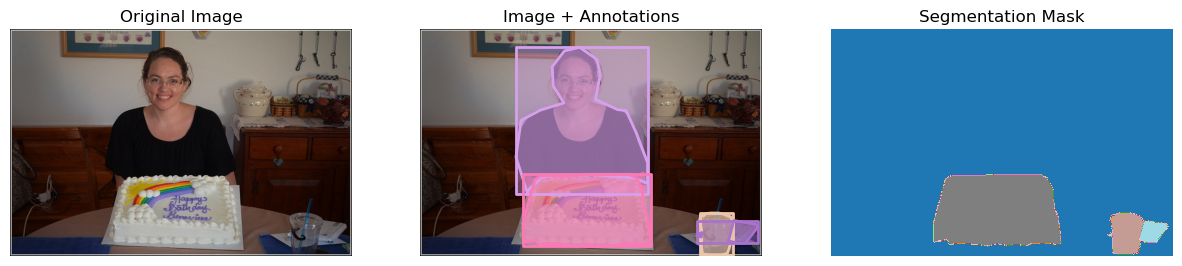

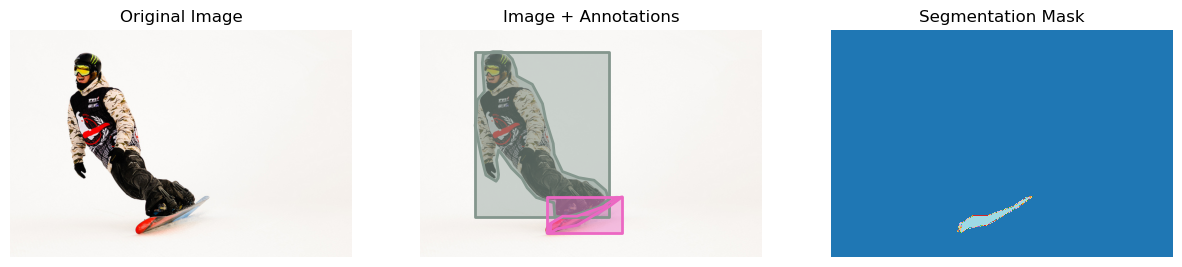

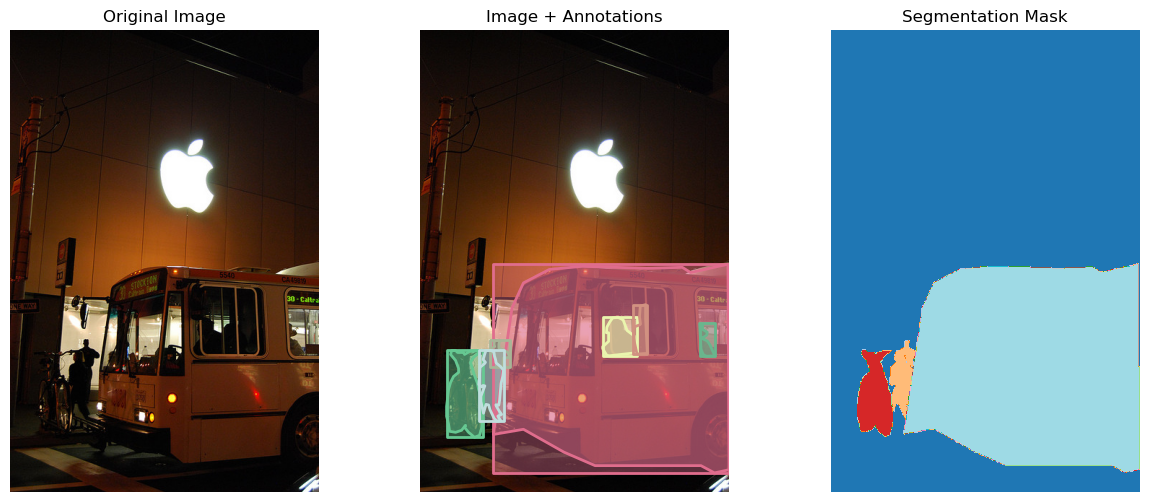

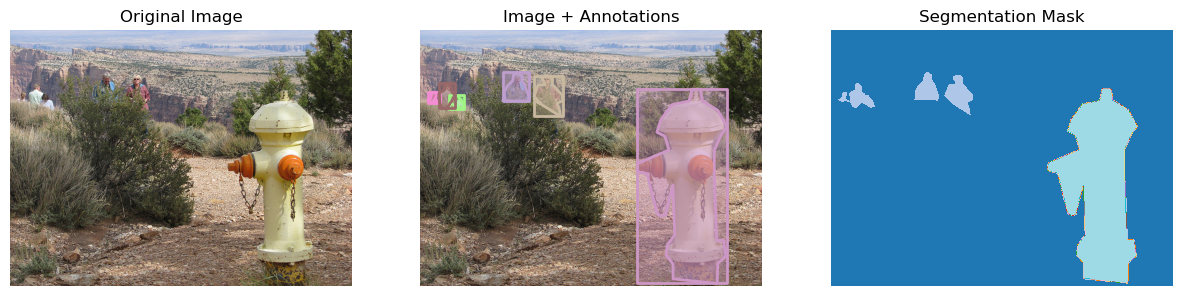

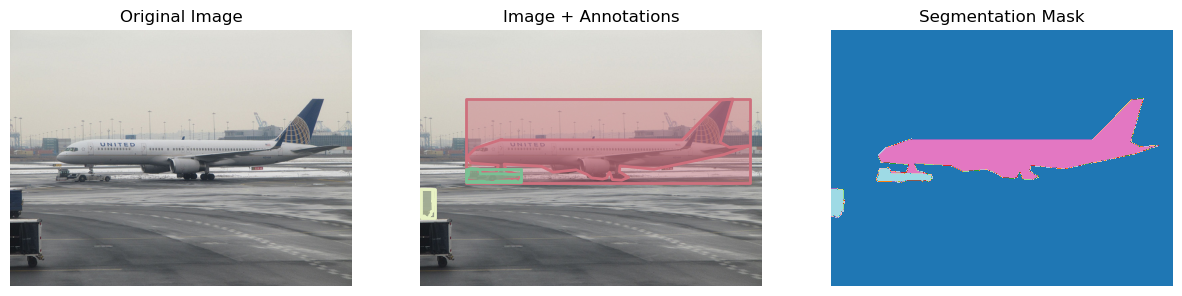

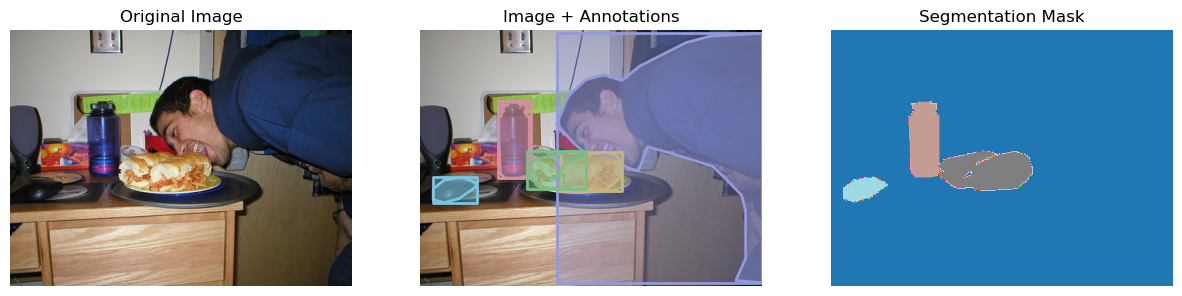

In [11]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import cv2

# ==========================
# Step 1: Paths
# ==========================
# Make sure this folder contains both "val2017/" and "annotations/"
data_dir = r"C:\Users\laksh\coco_dataset"   # <-- update this path if different
ann_file = os.path.join(data_dir, "annotations", "instances_val2017.json")
img_dir = os.path.join(data_dir, "val2017")

# ==========================
# Step 2: Load COCO Annotations
# ==========================
coco = COCO(ann_file)

# ==========================
# Step 3: Function to show one image + annotations
# ==========================
def show_example():
    # Pick a random image
    img_id = random.choice(coco.getImgIds())
    img_info = coco.loadImgs(img_id)[0]
    
    # Load image
    img_path = os.path.join(img_dir, img_info['file_name'])
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Load annotations
    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)
    
    # Create mask
    mask = np.zeros((img_info['height'], img_info['width']))
    for ann in anns:
        mask = np.maximum(mask, coco.annToMask(ann) * ann['category_id'])
    
    # Plot
    plt.figure(figsize=(15, 6))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title("Original Image")

    # Image with annotations
    plt.subplot(1, 3, 2)
    plt.imshow(image)
    coco.showAnns(anns, draw_bbox=True)
    plt.axis('off')
    plt.title("Image + Annotations")

    # Segmentation mask
    plt.subplot(1, 3, 3)
    plt.imshow(mask, cmap='tab20')
    plt.axis('off')
    plt.title("Segmentation Mask")

    plt.show()

# ==========================
# Step 4: Show multiple examples
# ==========================
for _ in range(6):   # show 3 random images
    show_example()

loading annotations into memory...
Done (t=1.29s)
creating index...
index created!


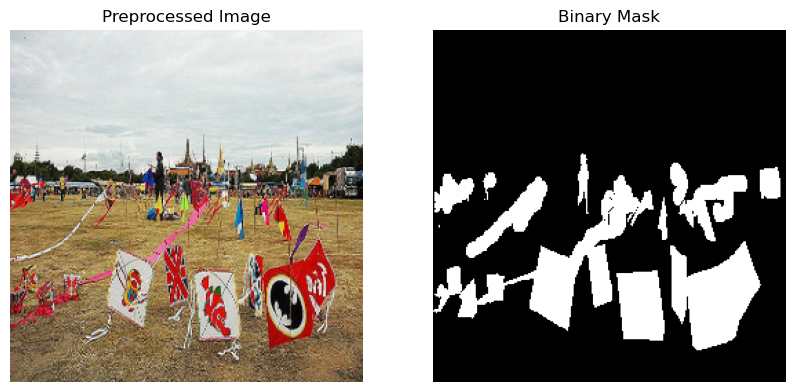

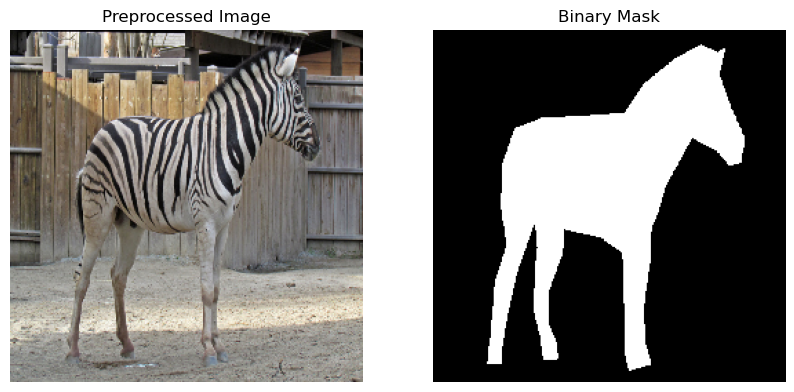

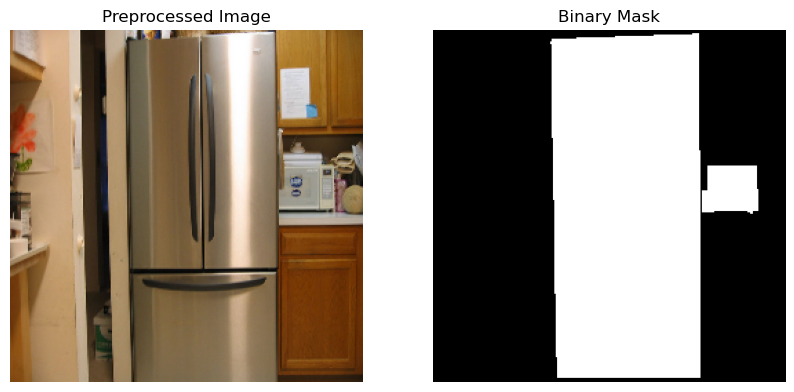

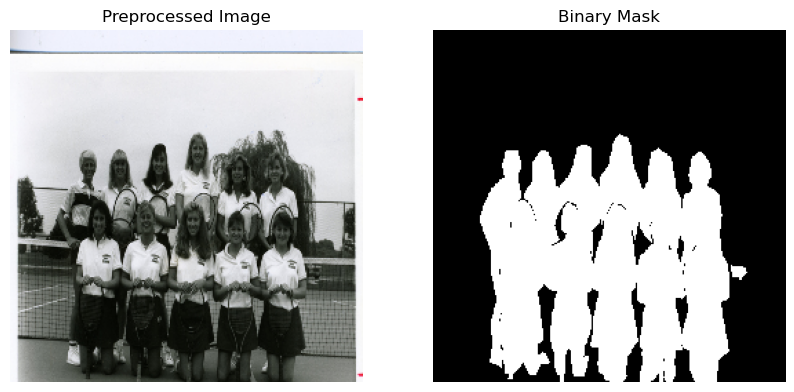

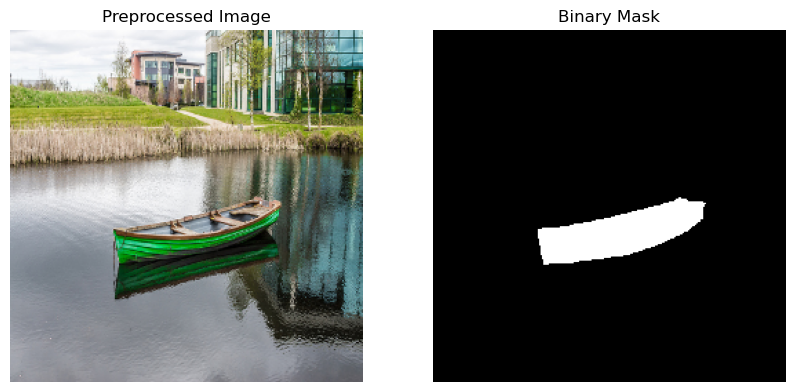

In [12]:
import os
import random
import numpy as np
import cv2
from pycocotools.coco import COCO
import matplotlib.pyplot as plt

# ==========================
# Step 1: Paths
# ==========================
data_dir = r"C:\Users\laksh\coco_dataset"   # update if needed
ann_file = os.path.join(data_dir, "annotations", "instances_val2017.json")
img_dir = os.path.join(data_dir, "val2017")

# Load COCO
coco = COCO(ann_file)

# ==========================
# Step 2: Preprocessing function
# ==========================
def preprocess_image_and_mask(img_id, target_size=(256, 256)):
    """Load image and mask, then preprocess: resize, normalize, binary mask."""
    
    # Get image info
    img_info = coco.loadImgs(img_id)[0]
    img_path = os.path.join(img_dir, img_info['file_name'])

    # Load image (RGB)
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Load annotations
    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)

    # Build multi-class mask first
    mask = np.zeros((img_info['height'], img_info['width']), dtype=np.uint8)
    for ann in anns:
        mask = np.maximum(mask, coco.annToMask(ann))  # union of all masks

    # Convert to binary mask (subject=1, background=0)
    binary_mask = (mask > 0).astype(np.uint8)

    # Resize image & mask to target size
    image_resized = cv2.resize(image, target_size, interpolation=cv2.INTER_LINEAR)
    mask_resized = cv2.resize(binary_mask, target_size, interpolation=cv2.INTER_NEAREST)

    # Normalize image to [0,1]
    image_resized = image_resized.astype(np.float32) / 255.0

    return image_resized, mask_resized

# ==========================
# Step 3: Visualize examples
# ==========================
def show_preprocessed_examples(num_examples=3):
    img_ids = random.sample(coco.getImgIds(), num_examples)
    
    for img_id in img_ids:
        image, mask = preprocess_image_and_mask(img_id)

        plt.figure(figsize=(10, 5))

        # Show image
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.axis('off')
        plt.title("Preprocessed Image")

        # Show binary mask
        plt.subplot(1, 2, 2)
        plt.imshow(mask, cmap="gray")
        plt.axis('off')
        plt.title("Binary Mask")

        plt.show()

# ==========================
# Step 4: Run demo
# ==========================
show_preprocessed_examples(num_examples=5)  # show 5 samples


loading annotations into memory...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Done (t=1.14s)
creating index...
index created!


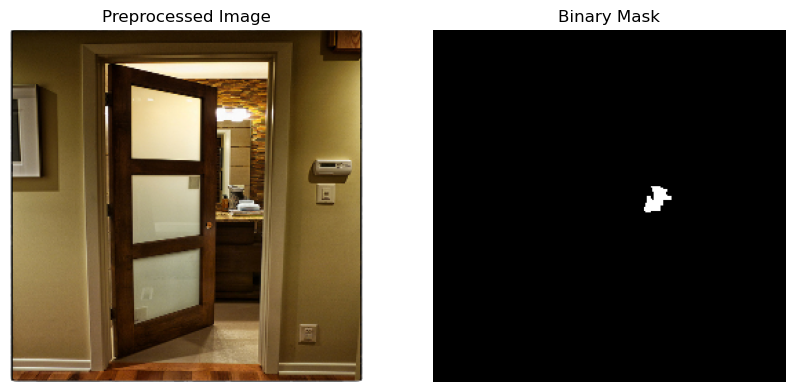

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


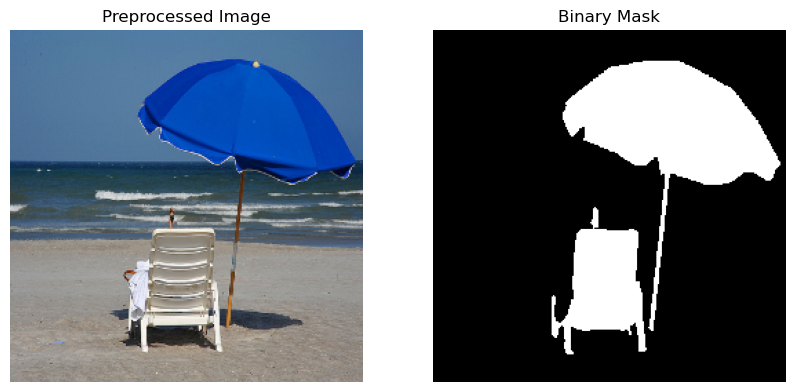

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


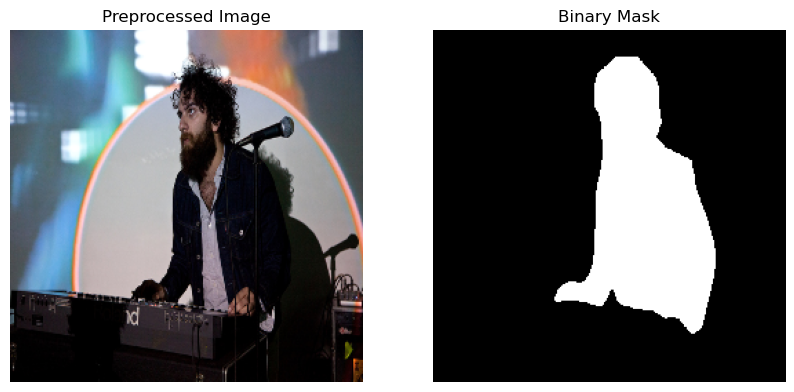

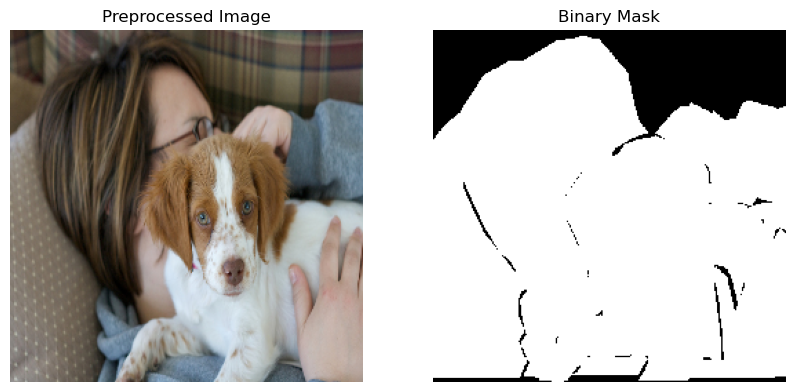

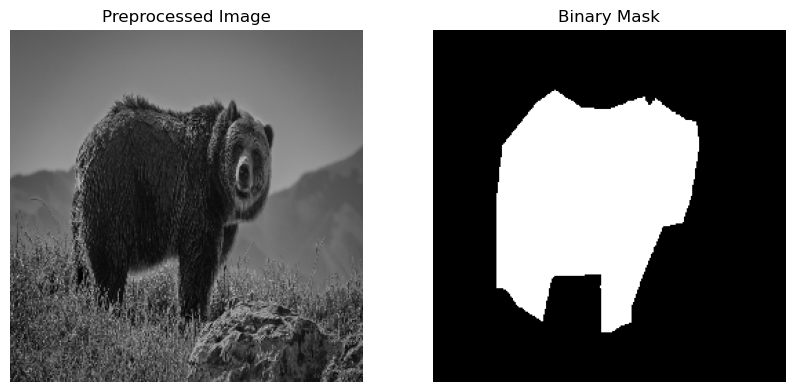

In [1]:
import os
import random
import numpy as np
import cv2
from pycocotools.coco import COCO
import matplotlib.pyplot as plt

# ==========================
# Step 1: Paths
# ==========================
data_dir = r"C:\Users\laksh\coco_dataset"   # <-- update if needed
ann_file = os.path.join(data_dir, "annotations", "instances_val2017.json")
img_dir = os.path.join(data_dir, "val2017")

# Load COCO annotations
coco = COCO(ann_file)

# ==========================
# Step 2: Preprocessing function
# ==========================
def preprocess_image_and_mask(img_id, target_size=(256, 256)):
    """Load image and mask, then preprocess: resize, normalize (/250), binary mask."""
    
    # Get image info
    img_info = coco.loadImgs(img_id)[0]
    img_path = os.path.join(img_dir, img_info['file_name'])

    # Load image (BGR → RGB)
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Load annotations for this image
    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)

    # Build combined mask (union of all objects)
    mask = np.zeros((img_info['height'], img_info['width']), dtype=np.uint8)
    for ann in anns:
        mask = np.maximum(mask, coco.annToMask(ann))

    # Convert to binary mask (subject=1, background=0)
    binary_mask = (mask > 0).astype(np.uint8)

    # Resize image and mask
    image_resized = cv2.resize(image, target_size, interpolation=cv2.INTER_LINEAR)
    mask_resized = cv2.resize(binary_mask, target_size, interpolation=cv2.INTER_NEAREST)

    # Normalize image (divide each pixel by 250 instead of 255)
    image_resized = image_resized.astype(np.float32) / 250.0

    return image_resized, mask_resized

# ==========================
# Step 3: Visualization function
# ==========================
def show_preprocessed_examples(num_examples=3):
    """Display a few preprocessed images and their binary masks."""
    img_ids = random.sample(coco.getImgIds(), num_examples)
    
    for img_id in img_ids:
        image, mask = preprocess_image_and_mask(img_id)

        plt.figure(figsize=(10, 5))

        # Show image
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.axis('off')
        plt.title("Preprocessed Image")

        # Show binary mask
        plt.subplot(1, 2, 2)
        plt.imshow(mask, cmap="gray")
        plt.axis('off')
        plt.title("Binary Mask")

        plt.show()

# ==========================
# Step 4: Run demo
# ==========================
show_preprocessed_examples(num_examples=5)  # show 5 random samples


loading annotations into memory...
Done (t=1.24s)
creating index...
index created!


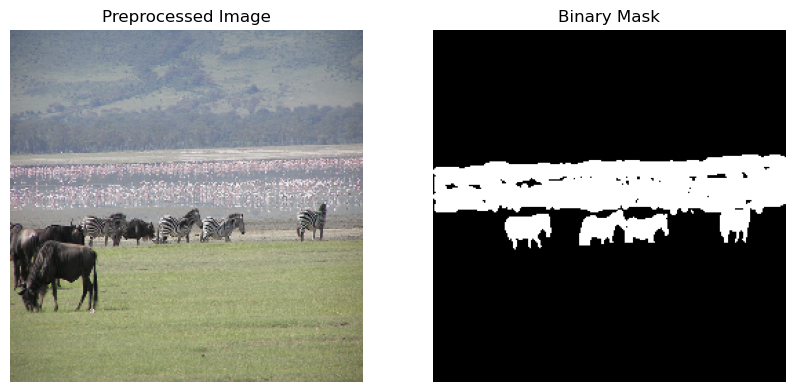

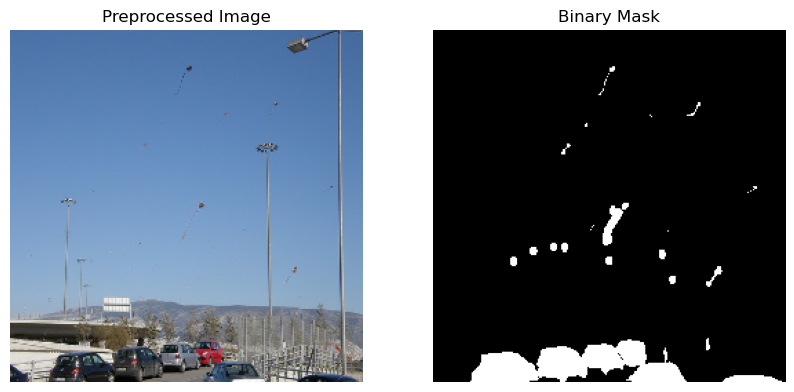

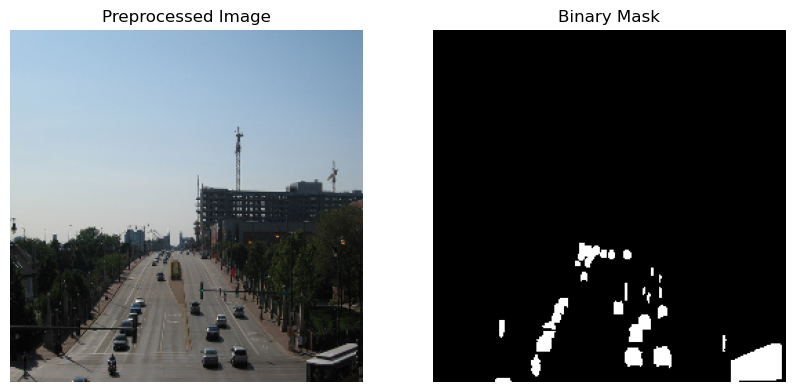

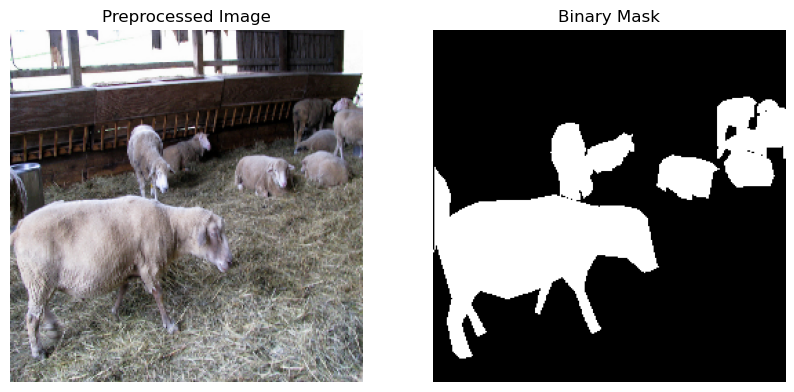

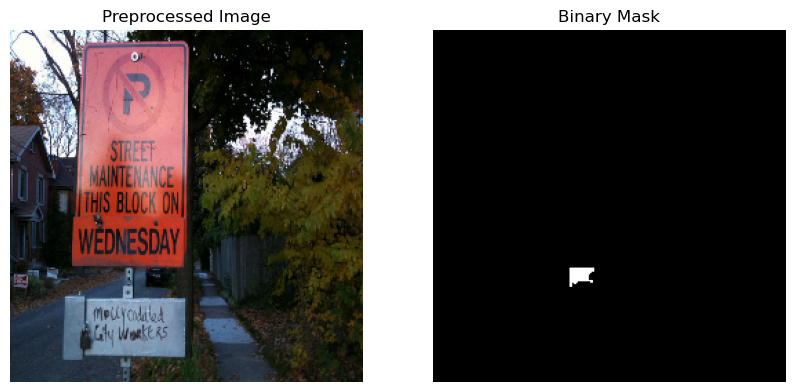

In [2]:
import os
import random
import numpy as np
import cv2
from pycocotools.coco import COCO
import matplotlib.pyplot as plt

# ==========================
# Step 1: Paths
# ==========================
data_dir = r"C:\Users\laksh\coco_dataset"   # <-- update if needed
ann_file = os.path.join(data_dir, "annotations", "instances_val2017.json")
img_dir = os.path.join(data_dir, "val2017")

# Load COCO annotations
coco = COCO(ann_file)

# ==========================
# Step 2: Preprocessing function
# ==========================
def preprocess_image_and_mask(img_id, target_size=(256, 256)):
    """Load image and mask, then preprocess: resize, normalize (/250), binary mask."""
    
    # Get image info
    img_info = coco.loadImgs(img_id)[0]
    img_path = os.path.join(img_dir, img_info['file_name'])

    # Load image (BGR → RGB)
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Load annotations for this image
    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)

    # Build combined mask (union of all objects)
    mask = np.zeros((img_info['height'], img_info['width']), dtype=np.uint8)
    for ann in anns:
        mask = np.maximum(mask, coco.annToMask(ann))

    # Convert to binary mask (subject=1, background=0)
    binary_mask = (mask > 0).astype(np.uint8)

    # Resize image and mask
    image_resized = cv2.resize(image, target_size, interpolation=cv2.INTER_LINEAR)
    mask_resized = cv2.resize(binary_mask, target_size, interpolation=cv2.INTER_NEAREST)

    # Normalize image (divide each pixel by 250 instead of 255)
    image_resized = image_resized.astype(np.float32) / 256.0

    return image_resized, mask_resized

# ==========================
# Step 3: Visualization function
# ==========================
def show_preprocessed_examples(num_examples=3):
    """Display a few preprocessed images and their binary masks."""
    img_ids = random.sample(coco.getImgIds(), num_examples)
    
    for img_id in img_ids:
        image, mask = preprocess_image_and_mask(img_id)

        plt.figure(figsize=(10, 5))

        # Show image
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.axis('off')
        plt.title("Preprocessed Image")

        # Show binary mask
        plt.subplot(1, 2, 2)
        plt.imshow(mask, cmap="gray")
        plt.axis('off')
        plt.title("Binary Mask")

        plt.show()

# ==========================
# Step 4: Run demo
# ==========================
show_preprocessed_examples(num_examples=5)  # show 5 random samples


In [ ]:
//Milestone-2

In [16]:
import numpy as np
import random

# Suppose you have your preprocessing function preprocess_image_and_mask(img_id, target_size=(256,256))
img_ids = coco.getImgIds()
random.shuffle(img_ids)

X = []
y = []

for img_id in img_ids[:1000]:  # limit to 1000 samples for quick training (can increase later)
    image, mask = preprocess_image_and_mask(img_id, target_size=(128,128))  # smaller size speeds up training
    X.append(image)
    y.append(mask)

X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)
y = np.expand_dims(y, axis=-1)  # add channel dimension

print("Images shape:", X.shape)
print("Masks shape:", y.shape)


Images shape: (1000, 128, 128, 3)
Masks shape: (1000, 128, 128, 1)
